# Cricket Data Analysis for 6 International Teams

### Importing Data and Storing in Dataframes

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# datasets obtained from data.world
test_data = 'https://raw.githubusercontent.com/RiddhamSadana/demobygit/master/testdata.csv'
odi_data = 'https://raw.githubusercontent.com/RiddhamSadana/demobygit/master/odidata.csv'
test_old_data = 'https://raw.githubusercontent.com/RiddhamSadana/demobygit/master/testolddata.csv'
odi_old_data = 'https://raw.githubusercontent.com/RiddhamSadana/demobygit/master/odiolddata.csv'

# reading data into dataframes
test_df = pd.read_csv(test_data)
test_old_df = pd.read_csv(test_old_data)
odi_df = pd.read_csv(odi_data)
odi_old_df = pd.read_csv(odi_old_data)

# concatenating old data with the new one
test_df = pd.concat([test_old_df, test_df])
odi_df = pd.concat([odi_old_df, odi_df])




### Cleaning Test matches data and finding win percentage over the years

In [2]:
# Working on test matches data


# filtering required columns and years
test_df = test_df[['Result', 'Match Year', 'Country']]
test_df = test_df[test_df['Match Year']>=1990]

# considering only matches that had a result
test_mask = (test_df['Result'].isin(['Won', 'Lost', 'Draw']))
test_df = test_df[test_mask]

# considering only matches that had a result
test_df.Result.replace(('Won', 'Lost', 'Draw'), (1,0, 0), inplace=True)

# filtering out countries which didn't play enough matches or just for sake of simplicity
con_fil = ~(test_df['Country'].isin(['Ireland', 'Zimbabwe', 'Bangladesh','South Africa', 'Pakistan']))
test_df = test_df[con_fil]

# filtering out 2020 :( coronavirus
test_df = test_df[test_df['Match Year']!=2020]

# fnding win percentage country-wise for each year(1990-2019)
test_df.sort_values('Country', inplace=True)
groups = test_df.groupby(['Country', 'Match Year']).Result.mean()*100

# list of countries
countries = list(test_df['Country'].unique())

# data for plotting
cont = [groups[country] for country in countries]


### Cleaning ODI matches data and finding win percentage over the years

In [3]:
# Working on odi matches data


# filtering required columns and years
odi_df = odi_df[['Result', 'Match Year', 'Country']]
odi_df = odi_df[odi_df['Match Year']>=1990]

# considering only matches that had a result
odi_mask = (odi_df['Result'].isin(['Won', 'Lost', 'Tied']))
odi_df = odi_df[odi_mask]

# considering only matches that had a result
odi_df.Result.replace(('Won', 'Lost', 'Tied'), (1,0, 0), inplace=True)

# filtering out countries
odi_df = odi_df[odi_df['Country'].isin(test_df['Country'].values)]

# filtering out 2020 :( coronavirus
odi_df = odi_df[odi_df['Match Year']!=2020]

# fnding win percentage country-wise for each year(1990-2019)
odi_df.sort_values('Country', inplace=True)
odi_groups = odi_df.groupby(['Country', 'Match Year']).Result.mean()*100

# data for plotting
odi_cont = [odi_groups[country] for country in countries]

### Making an informative scatter plot 

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


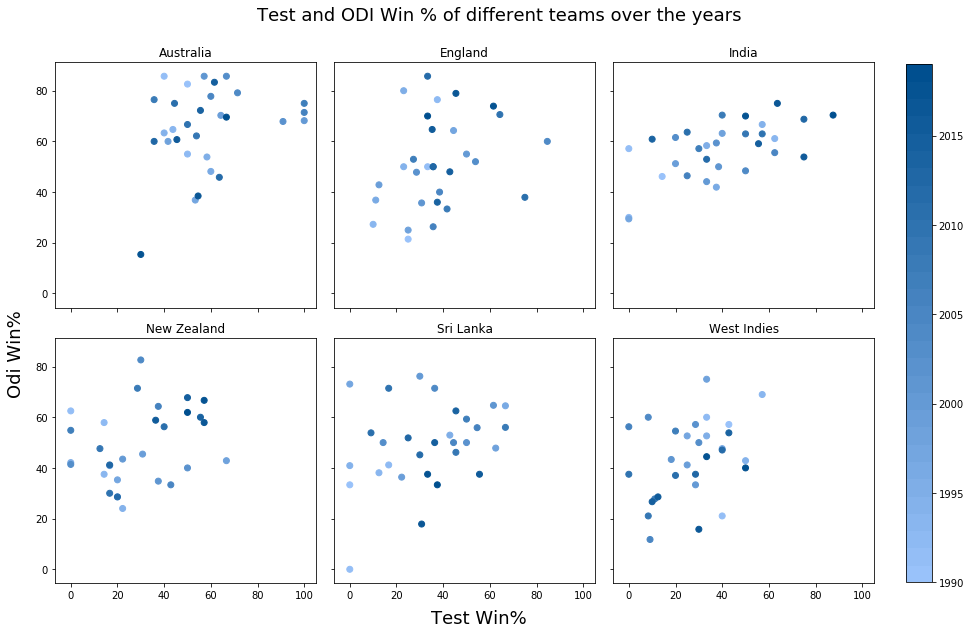

In [37]:
# making a plot

%matplotlib inline

# changing style
plt.style.use('seaborn-colorblind')

# figure and axes objects from subplots
fig, axs = plt.subplots(2,3, figsize=(12, 8), sharex=True, sharey=True)

# hiding grid and displaying x and y ticks
plt.grid(False)
plt.xticks(np.arange(0,120,20))
plt.yticks(np.arange(0,120,20))

#cm = plt.cm.get_cmap('YlOrRd')

# custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = [(0.6, 0.76, 0.98), (0, 0.31, 0.56)] # Experiment with this
cm = LinearSegmentedColormap.from_list('test', colors, N=30)

# list of years for colormap
years = np.arange(1990,2020,1)

# plotting
for i in range(2):
    for j in range(3):
        sc = axs[i,j].scatter(cont[3*i+j], odi_cont[3*i+j], c=years, cmap=cm)
        axs[i,j].title.set_text(countries[3*i+j])

# figure title and labels        
fig.suptitle('Test and ODI Win % of different teams over the years', fontsize=18, x = 0.55, y = 1.05)    
fig.text(0.47, -0.02, s='Test Win%', fontsize=18)
fig.text(-0.02, 0.5, s='Odi Win%', fontsize=18, rotation='vertical')

# colorbar location
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.02, 0.05, 0.03, 0.9])
fig.colorbar(sc, cax=cbar_ax)


plt.tight_layout()
plt.show()

### An additional line-plot comparison 

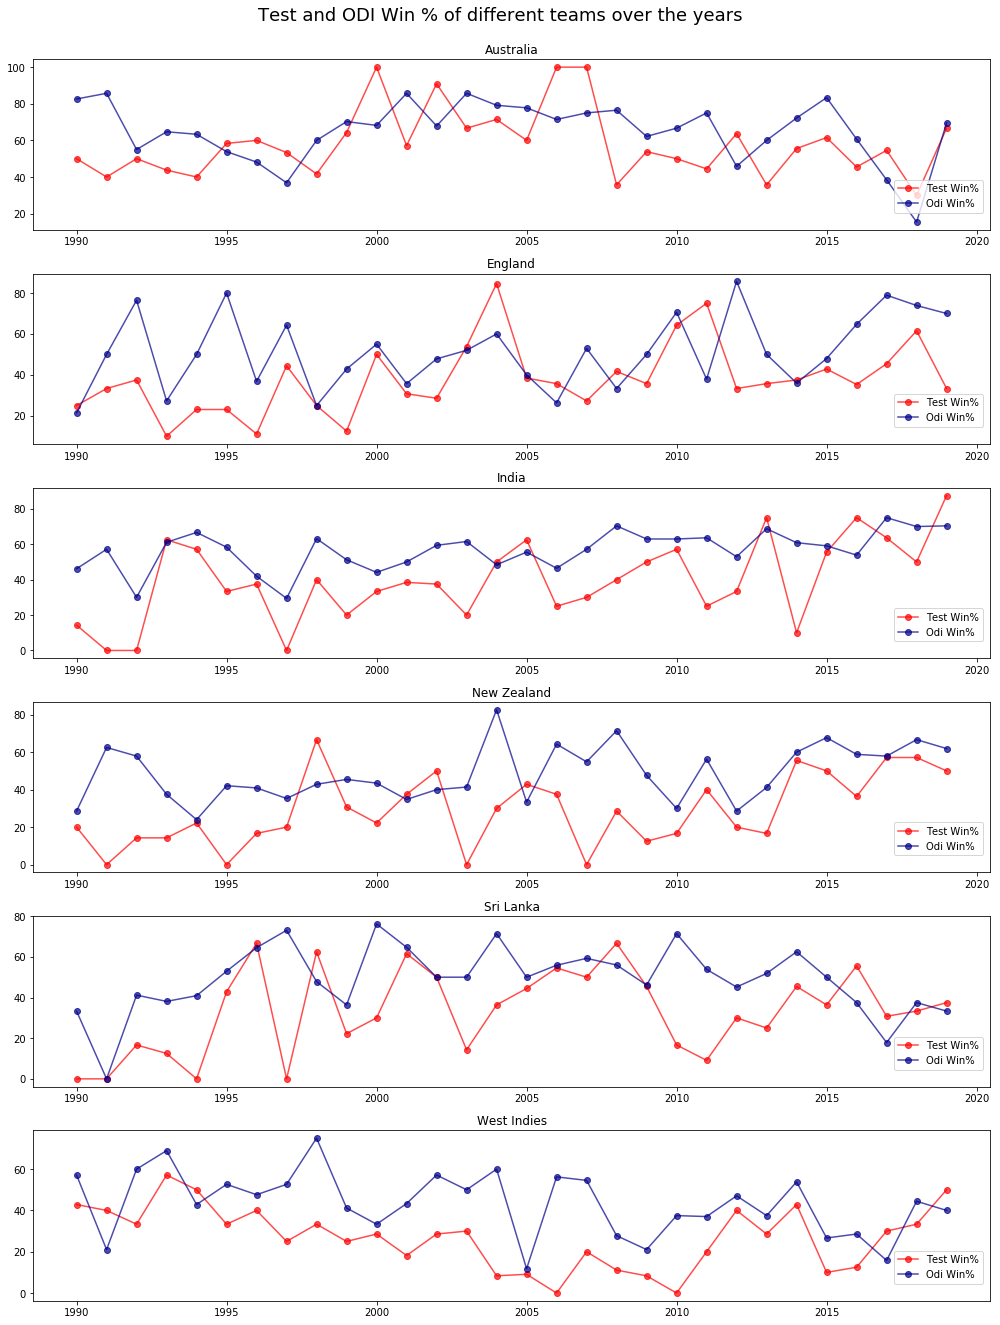

In [6]:
# Lineplot



fig, axs = plt.subplots(6, figsize=(14, 18))

plt.grid(False)
plt.xticks(np.arange(1990,2020,5))

for i in range(6):
    axs[i].plot(cont[i], '-o', label = 'Test Win%', alpha = 0.7, lw=1.5, color='r')
    axs[i].plot(odi_cont[i], '-o', label = 'Odi Win%', alpha = 0.7, lw=1.5, color='darkblue')
    axs[i].title.set_text(countries[i])
    
    axs[i].legend(loc=(0.9,0.1));
    
fig.suptitle('Test and ODI Win % of different teams over the years', fontsize=18, x = 0.5, y = 1.02)    

plt.tight_layout()
plt.show()